## Parametry

In [1]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float32'
LEARNING_RATE = 0.0002
EPOCHS = 20
BATCH_SIZE = 32
COMPRESSION = 17

## Wczytanie danych z pliku

In [2]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d_compression_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT, COMPRESSION))
print(data)
print(data.shape)

[[[-2.5161850e-01 -2.2578849e-01 -2.5785992e-02 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [-2.5161850e-01 -2.4774556e-01 -2.5785992e-02 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [-2.5161850e-01 -2.6970261e-01 -7.3671199e-02 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  ...
  [ 5.3344636e+00 -4.8927328e-01 -3.3703986e-01 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 1.4738737e-01 -5.5514449e-01 -4.5675287e-01 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [-2.5161850e-01 -4.2340207e-01 -3.8492507e-01 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]]

 [[-2.5161850e-01 -7.0884395e-01 -8.8771975e-01 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [-2.5161850e-01 -7.5275809e-01 -8.8771975e-01 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [-2.5161850e-01 -7.5275809e-01 -8.6377716e-01 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  ...
  [-2.5161850e-01 -1.4114701e+00 -1.3905145e+00 ...  0.0000000e+00
    0.0000

## Wydzielenie zbiorów

In [3]:
from sklearn.model_selection import train_test_split

X = data[:, :SERIES_LENGHT - 1, :]
Y = data[:, SERIES_LENGHT - 1, :]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (76044, 71, 55)


## Definicja sieci

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import *
from script.main.loss_functions import *
import tensorflow as tf

model = Sequential()
model.add(LSTM(units=55, activation='tanh', return_sequences=True, input_shape=(SERIES_LENGHT - 1,55)))
model.add(LSTM(units=55, activation='tanh'))
model.add(Dense(19))
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE, beta_1=0.75), metrics=['accuracy'])

Using TensorFlow backend.


## Diagram sieci

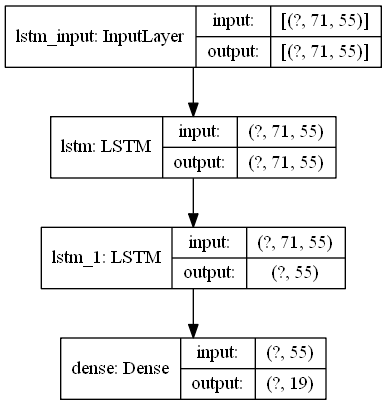

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [6]:
from script.main.callback.hyperdash_callback import HyperdashCallback
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='.\logs', histogram_freq=1),
    HyperdashCallback(),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]
 
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, callbacks=my_callbacks, validation_data=(X_test, Y_test))
  

Train on 76044 samples, validate on 25348 samples
Epoch 1/20
| progress:   0.100000 |
| loss:   0.185932 |
| val_loss:   0.135084 |
76044/76044 - 22s - loss: 0.1859 - accuracy: 0.4874 - val_loss: 0.1351 - val_accuracy: 0.5934
Epoch 2/20
| progress:   0.061781 |
| loss:   0.124152 |
| val_loss:   0.119220 |
76044/76044 - 18s - loss: 0.1242 - accuracy: 0.6354 - val_loss: 0.1192 - val_accuracy: 0.6505
Epoch 3/20
| progress:   0.008873 |
| loss:   0.115279 |
| val_loss:   0.114647 |
76044/76044 - 18s - loss: 0.1153 - accuracy: 0.6586 - val_loss: 0.1146 - val_accuracy: 0.6602
Epoch 4/20
| progress:   0.002571 |
| loss:   0.112708 |
| val_loss:   0.113186 |
76044/76044 - 18s - loss: 0.1127 - accuracy: 0.6630 - val_loss: 0.1132 - val_accuracy: 0.6632
Epoch 5/20
| progress:   0.001319 |
| loss:   0.111389 |
| val_loss:   0.111965 |
76044/76044 - 18s - loss: 0.1114 - accuracy: 0.6673 - val_loss: 0.1120 - val_accuracy: 0.6663
Epoch 6/20
| progress:   0.000923 |
| loss:   0.110466 |
| val_loss:  

## Zapis modelu od pliku

In [7]:
model.save("../resources/trained_model_type2.h5", save_format='tf')

## Zapis danych testowych do pliku

In [8]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

## 